Imports

In [1]:
import os
import sys

import numpy as np
from torch import tensor, nn
import torch
from torchvision import transforms
import torchvision
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(r'../../'))

from src.utils.common import get_model_resnet18_cifar10, get_loader, create_saved_data_dir, get_device, save, load
from src.utils.dataset import get_cifar, GPUDataset
from src.utils.plot import plot_loss_acc
from src.utils.train import train, ModelManager, Mode

# Globals
NUM_CLASSES = 100
BATCH_SIZE = 25
NUM_TRAIN = 50000
NUM_VALID = 10000
NUM_TEST = 10000
EPOCHS = 10

DEVICE = get_device()

# Get datasets & loaders

# # classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# data_train, data_test = get_cifar(os.path.abspath(os.path.join('../../../', 'datasets')))
# loader_train = get_loader(data_train, np.arange(NUM_TRAIN), BATCH_SIZE)
# loader_train_ordered = get_loader(data_train, np.arange(NUM_TRAIN), BATCH_SIZE, shuffle=False)
# # loader_valid = get_loader(data_train, np.arange(NUM_TRAIN, NUM_VALID + NUM_TRAIN), BATCH_SIZE)
# loader_test = get_loader(data_test, np.arange(NUM_TEST), BATCH_SIZE)
# Y_train = tensor(data_train.targets)[np.arange(NUM_TRAIN)]

CUDA is available!  Training on  GPU...


# Train with kernel 7x7 and normalization

In [3]:
model_manager = ModelManager(NUM_CLASSES, 'norm')
model_manager.train(loader_train, loader_test, loader_test, EPOCHS)

Epoch: 0 Training: Loss: 0.138256 Acc: 0.180040  Validation Loss: 0.114031 Acc: 0.279900                                                           
Validation loss decreased (inf --> 0.114031).  Saving model to models_data/norm
Epoch: 1 Training: Loss: 0.103357 Acc: 0.338480  Validation Loss: 0.096974 Acc: 0.377400                                                           
Validation loss decreased (0.114031 --> 0.096974).  Saving model to models_data/norm
Epoch: 2 Training: Loss: 0.082636 Acc: 0.448040  Validation Loss: 0.092081 Acc: 0.408600                                                           
Validation loss decreased (0.096974 --> 0.092081).  Saving model to models_data/norm
Epoch: 3 Training: Loss: 0.064329 Acc: 0.552340  Validation Loss: 0.090244 Acc: 0.425100                                                           
Validation loss decreased (0.092081 --> 0.090244).  Saving model to models_data/norm
Epoch: 4 Training: Loss: 0.046453 Acc: 0.664300  Validation Loss: 0.09528

# Train with kernel 3x3 and normalization

In [2]:
model_manager = ModelManager(NUM_CLASSES, 'norm_lr_3')
model_manager.train(loader_train, loader_test, loader_test, EPOCHS)

[{'params': [Parameter containing:
tensor([[[[-0.0341, -0.0399,  0.1190],
          [-0.1486,  0.0346,  0.1643],
          [ 0.0553,  0.1363, -0.0992]],

         [[ 0.0761,  0.1493, -0.0731],
          [-0.0532, -0.1159, -0.0878],
          [-0.1701, -0.0235, -0.0633]],

         [[-0.1192,  0.1526, -0.0847],
          [-0.1023, -0.1399,  0.0906],
          [-0.0024,  0.0620, -0.0537]]],


        [[[-0.0162, -0.1292,  0.1758],
          [-0.1758, -0.0247, -0.1110],
          [ 0.1381, -0.0294, -0.0339]],

         [[-0.1131, -0.0741, -0.1150],
          [-0.1232,  0.1682,  0.0721],
          [-0.0405,  0.1016,  0.1271]],

         [[-0.0431,  0.0836,  0.0525],
          [ 0.1280,  0.0297, -0.0292],
          [-0.1871,  0.0213,  0.0489]]],


        [[[ 0.1730,  0.1868,  0.0228],
          [-0.0283, -0.1545, -0.0504],
          [-0.0976,  0.1917,  0.0458]],

         [[-0.1118,  0.0409, -0.1182],
          [-0.0453,  0.1725,  0.1823],
          [-0.0650, -0.1369,  0.0954]],

         

# Train with kernel 7x7 and without normalization

In [2]:
model_manager = ModelManager(NUM_CLASSES, 'norm_lr_2')
model_manager.train(loader_train, loader_test, loader_test, EPOCHS)

[{'params': [Parameter containing:
tensor([[[[ 0.0492, -0.1302, -0.0930],
          [-0.1601,  0.1543,  0.1656],
          [-0.1700, -0.0172, -0.1393]],

         [[-0.0775, -0.0761,  0.0440],
          [-0.0616,  0.1803, -0.1083],
          [-0.0818,  0.1923, -0.0451]],

         [[ 0.1704,  0.0376, -0.1620],
          [ 0.0748,  0.0734, -0.0263],
          [ 0.0883,  0.1357, -0.1860]]],


        [[[-0.1066,  0.0639,  0.0689],
          [ 0.0877,  0.0119, -0.0270],
          [ 0.0091, -0.1168, -0.0182]],

         [[ 0.0838, -0.1471, -0.1509],
          [ 0.0826, -0.0471,  0.0459],
          [-0.1127,  0.1564,  0.0536]],

         [[ 0.0717, -0.1651,  0.0388],
          [-0.1038,  0.0253, -0.1315],
          [-0.0974, -0.0474, -0.0157]]],


        [[[ 0.1744,  0.0847,  0.1919],
          [ 0.1334,  0.0583,  0.1476],
          [-0.1504,  0.1088, -0.0424]],

         [[-0.0027,  0.1643, -0.1447],
          [ 0.0336,  0.0655,  0.0746],
          [-0.0201,  0.1920, -0.0809]],

         

# Train with kernel 3x3 and without normalization

In [2]:
model_manager = ModelManager(NUM_CLASSES, 'norm_05_lr_2')
model_manager.train(loader_train, loader_test, loader_test, EPOCHS)

[{'params': [Parameter containing:
tensor([[[[ 0.0846, -0.1127, -0.0130],
          [-0.0667, -0.1302, -0.0646],
          [ 0.0968,  0.0103, -0.0190]],

         [[-0.0408, -0.1454, -0.1491],
          [-0.1396, -0.1580, -0.0630],
          [-0.1487,  0.0111,  0.1192]],

         [[ 0.0317,  0.0219, -0.1468],
          [ 0.0012, -0.1446, -0.0025],
          [-0.1893,  0.0595, -0.0037]]],


        [[[-0.1840,  0.0423,  0.0576],
          [-0.1772, -0.0535, -0.1680],
          [ 0.1418, -0.1165, -0.1738]],

         [[ 0.1799, -0.1749,  0.1830],
          [-0.1184,  0.0783,  0.1863],
          [ 0.1570,  0.1164,  0.0447]],

         [[-0.0843, -0.0285,  0.0291],
          [-0.0049, -0.0124, -0.0024],
          [ 0.1329,  0.0573,  0.1847]]],


        [[[ 0.0245, -0.0352,  0.1183],
          [ 0.1388,  0.0213, -0.0731],
          [ 0.0400,  0.1146, -0.0480]],

         [[-0.1013, -0.0619,  0.0647],
          [ 0.1510,  0.1167, -0.0940],
          [ 0.1035, -0.1349,  0.0707]],

         

# Train with kernel 3x3 and with .5 normalization

In [2]:
model_manager = ModelManager(NUM_CLASSES, 'norm_05_lr_3')
model_manager.train(loader_train, loader_test, loader_test, EPOCHS)

[{'params': [Parameter containing:
tensor([[[[ 0.1814,  0.1464, -0.1546],
          [-0.0044, -0.1330,  0.0428],
          [ 0.0179, -0.0962, -0.1795]],

         [[ 0.0374,  0.0634, -0.1499],
          [ 0.0158,  0.1686,  0.1260],
          [-0.0942, -0.0066, -0.0101]],

         [[ 0.1630, -0.1371,  0.0057],
          [-0.0275, -0.0134, -0.1850],
          [-0.0977, -0.0347,  0.0245]]],


        [[[ 0.1510,  0.0535, -0.1393],
          [ 0.0224, -0.0779, -0.0793],
          [ 0.0241,  0.0095, -0.1282]],

         [[-0.1456, -0.1912,  0.0885],
          [-0.0986,  0.0032,  0.0826],
          [ 0.1584, -0.1232, -0.0633]],

         [[-0.1777, -0.1830, -0.0646],
          [-0.0307, -0.1696,  0.1351],
          [ 0.0627, -0.0419, -0.0217]]],


        [[[-0.0579,  0.0739,  0.1782],
          [-0.1828,  0.0949, -0.0407],
          [ 0.1299,  0.1423, -0.0956]],

         [[-0.0590,  0.1520,  0.0893],
          [ 0.0229,  0.0980,  0.0531],
          [-0.0790, -0.0619, -0.0532]],

         

In [3]:
model_manager = ModelManager(NUM_CLASSES, 'norm_05_lr_4')
model_manager.train(loader_train, loader_test, loader_test, EPOCHS)

[{'params': [Parameter containing:
tensor([[[[ 0.0681, -0.0195,  0.1062],
          [ 0.1515,  0.1868,  0.0641],
          [ 0.1601, -0.0176,  0.1316]],

         [[-0.1554,  0.0309, -0.0630],
          [ 0.1455,  0.1866,  0.0328],
          [-0.0576, -0.1422, -0.0474]],

         [[ 0.0733, -0.0778, -0.1137],
          [-0.0018, -0.0796, -0.1324],
          [ 0.1828, -0.0505,  0.0128]]],


        [[[-0.0224, -0.1102, -0.0341],
          [ 0.0438, -0.1901,  0.1497],
          [ 0.0084, -0.0072, -0.1514]],

         [[-0.0175, -0.1133,  0.0235],
          [-0.1670,  0.0408, -0.1693],
          [ 0.0943, -0.0609, -0.0295]],

         [[-0.0250, -0.1717,  0.0229],
          [ 0.0041,  0.1132,  0.1849],
          [ 0.1807, -0.1753,  0.0290]]],


        [[[ 0.1235, -0.1331,  0.1520],
          [ 0.0814, -0.0500, -0.0477],
          [ 0.0139,  0.1717,  0.1915]],

         [[-0.0630, -0.1139,  0.1822],
          [-0.1648, -0.0808,  0.1560],
          [ 0.1886, -0.0229,  0.0013]],

         

In [2]:
model_manager = ModelManager(NUM_CLASSES, 'norm_no_norm_lr_3')
model_manager.train(loader_train, loader_test, loader_test, EPOCHS)

[{'params': [Parameter containing:
tensor([[[[-0.0128, -0.0986, -0.1157],
          [-0.1153,  0.1605,  0.0624],
          [-0.1208,  0.0066, -0.1378]],

         [[-0.0677,  0.0230,  0.0241],
          [-0.1083,  0.0935,  0.0817],
          [ 0.1613, -0.1553, -0.1788]],

         [[-0.0081, -0.1678, -0.1909],
          [ 0.0273, -0.1579, -0.0804],
          [ 0.1425,  0.1608, -0.0373]]],


        [[[ 0.1124,  0.1378,  0.1358],
          [-0.1508, -0.0461, -0.1768],
          [ 0.0423,  0.0975, -0.0803]],

         [[-0.0969, -0.0948,  0.0412],
          [-0.1859,  0.0876, -0.1814],
          [ 0.1353,  0.0977,  0.0261]],

         [[-0.1643, -0.1668,  0.0067],
          [ 0.0239,  0.1531, -0.0431],
          [-0.0117, -0.0821,  0.0827]]],


        [[[ 0.1344,  0.0043,  0.0382],
          [-0.1654, -0.0267, -0.1287],
          [-0.1347,  0.1093, -0.1847]],

         [[ 0.0605, -0.0842, -0.0192],
          [-0.1391, -0.0655, -0.0888],
          [-0.0301, -0.0027,  0.1599]],

         

# Train with kernel 3x3 and with normalization, add fc with 128 and with flip

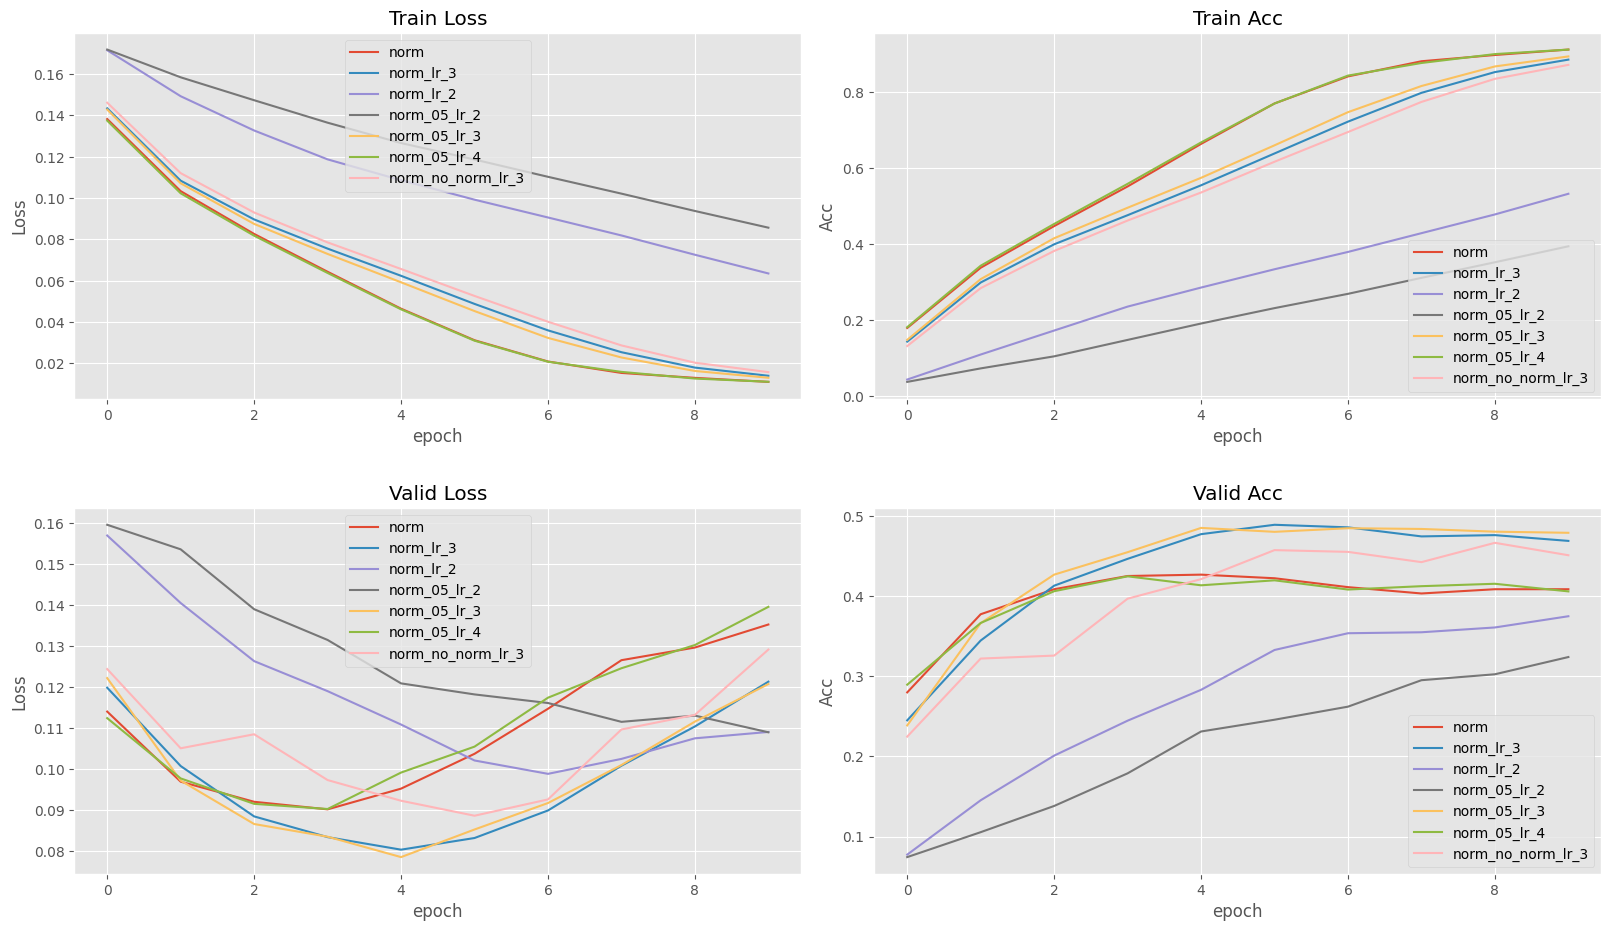

In [2]:
path = lambda f: os.path.join(ModelManager.DIR_ROOT, 'models_data', f, 'progress.pt')

data_models = {k: torch.load(path(k)) for k in
               ['norm', 'norm_lr_3', 'norm_lr_2', 'norm_05_lr_2', 'norm_05_lr_3', 'norm_05_lr_4', 'norm_no_norm_lr_3']}

train_valid, loss_acc, loc = ['train', 'valid'], ['loss', 'acc'], ['upper center', 'lower right']
epochs = np.arange(EPOCHS)

plt.style.use('ggplot')
fig, axes = plt.subplots(2, 2, figsize=(16, 9))  #W,H
fig.tight_layout()
fig.subplots_adjust(wspace=.1, hspace=.3)

for i, ax in enumerate(axes.reshape(-1)):
    key1, key2 = train_valid[i // 2], loss_acc[i % 2]
    for k, v in data_models.items():
        ax.plot(epochs, v[key1][key2][:EPOCHS], label=k)
    ax.set_xlabel('epoch')
    ax.set_ylabel(key2.capitalize())
    ax.set_title(f'{key1.capitalize()} {key2.capitalize()}')
    ax.grid(True)
    ax.legend(loc=loc[i % 2])

plt.show()

In [3]:
from torch.utils.tensorboard import SummaryWriter

# models = {'3x3 norm': norm_lr_3, '7x7 norm': norm, '3x3 no norm': model_kernel3x3_no_norm,
#           '7x7 no norm': model_kernel7x7_no_norm, '3x3 norm .5': model_kernel3x3_norm_5,
#           '128 10': model_kernel3x3_128_10, 'flip': model_kernel3x3_flip}
tb = SummaryWriter(log_dir=os.path.join(ModelManager.DIR_ROOT_LOG, 'models_compare'))
for i in range(EPOCHS):
    tb.add_scalars('models loss', {**{f'{k} train': v['train']['loss'][i] for k, v in data_models.items()},
                                   **{f'{k} valid': v['valid']['loss'][i] for k, v in data_models.items()}}, i)
    tb.add_scalars('models acc', {**{f'{k} train': v['train']['acc'][i] for k, v in data_models.items()},
                                  **{f'{k} valid': v['valid']['acc'][i] for k, v in data_models.items()}}, i)

tb.close()

In [2]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
])
dataset_train = torchvision.datasets.CIFAR100(GPUDataset.PATH_DATASETS, train=True, transform=transform_train,
                                              download=True)
dataset_test = torchvision.datasets.CIFAR100(GPUDataset.PATH_DATASETS, train=False, transform=transform_test,
                                             download=True)
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=25, shuffle=True)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=25, shuffle=False)
# norm: reg,.5, batch:500,1000,100,50,25, +fc, maxpool,

Files already downloaded and verified
Files already downloaded and verified


In [3]:
model_manager = ModelManager(len(dataset_train.classes), 'reg',load=True)
model_manager.train(loader_train, loader_test, loader_test, 30)

Epoch: 0 Training: Loss: 0.166363 Acc: 0.053680  Validation Loss: 0.153512 Acc: 0.098700                                                          
Validation loss decreased (inf --> 0.153512).  Saving model to models_data/reg
Epoch: 1 Training: Loss: 0.146474 Acc: 0.125600  Validation Loss: 0.141477 Acc: 0.177800                                                           
Validation loss decreased (0.153512 --> 0.141477).  Saving model to models_data/reg
Epoch: 2 Training: Loss: 0.134199 Acc: 0.179700  Validation Loss: 0.129285 Acc: 0.222900                                                           
Validation loss decreased (0.141477 --> 0.129285).  Saving model to models_data/reg
Epoch: 3 Training: Loss: 0.125037 Acc: 0.222260  Validation Loss: 0.147429 Acc: 0.265000                                                           
Epoch: 4 Training: Loss: 0.116187 Acc: 0.265040  Validation Loss: 0.106820 Acc: 0.312700                                                           
Validation los

In [ ]:
model_manager = ModelManager(len(dataset_train.classes), 'reg',load=True)
model_manager.train(loader_train, loader_test, loader_test, 30)

Epoch: 30 Training: Loss: 0.041127 Acc: 0.697180  Validation Loss: 0.061968 Acc: 0.605700                                                           
Epoch 31 Validate: ███████████████████████████████████████▌                                226/400 [00:02<00:02, 77.78 batch/s, acc=33%, loss=0.035]